


# 项目：公映电影收益率--TMDB数据集探索

## 目录


<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#datafrom">数据源信息</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **本次报告的数据来源：已清洗Kaggle的原始TMDb电影数据。本次报告将对TMDb电影数据‘tmdb-movies.csv’进行探索性分析。**

> **分析目标：收益率（票房/预算）与多个因素的相关性。**

In [1]:
#导入需要使用的python工具包以及jupyter notbook魔法命令
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<a id='datafrom'></a>
## 数据源信息

<a id='wrangling'></a>
## TMDb电影数据整理

### 常规属性

数据概述：本次探索的TMDB数据集属于已经清洗过的数据，相对比较规范，但还需根据本次探索目标，做进一步数据整理。

In [2]:
#读取数据集
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


我们对读入的数据集前五行数据进行浏览观察，符合预期规范化数据结构，只是有多列数据中，有包含“|”的值普遍存在。

数据属性：

In [3]:
#观察数据属性
df_tmdb_cloumns = df_tmdb.columns.tolist()
print(df_tmdb_cloumns)

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


通过对数据集列的观察，我们发现与本次探索可能有较大关系的列：'budget', 'revenue', 'runtime', 'release_date','release_year'。因'release_date'包含'release_year'信息，故将其忽略。

数据评估：

In [4]:
df_tmdb.info()#数据集基本信息
df_tmdb.isnull().sum()#数据集空值统计

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

通过对数据集基本信息的解读，我们发现其有多个列的多个空值情况存在。这些信息将帮助我们对数据进一步整理。


### TMDb电影数据清理

清理列标签：

In [5]:
df_tmdb.columns = df_tmdb.columns.str.replace(' ', '_')#替换标签中的空格
df_tmdb.columns = df_tmdb.columns.str.replace('-', '_')#替换标签中的‘-’

对列标签（列名）的规范化，可以规避使用代码可能遇到的一些问题。

过滤，丢空，去重：

In [6]:
df_tmdb_data = df_tmdb[['revenue','budget','release_date','runtime']]#生成目标数据集，忽略不相关数据列。
df_tmdb_data.head()

,revenue,budget,release_date,runtime
0,1513528810,150000000,6/9/15,124
1,378436354,150000000,5/13/15,120
2,295238201,110000000,3/18/15,119
3,2068178225,200000000,12/15/15,136
4,1506249360,190000000,4/1/15,137


本次数据集探索将重点分析与电影收益率可能相关的特征，故选取了'revenue','budget','release_date','runtime'四个特征生成新的目标数据集：df_tmdb_data。

In [7]:
df_tmdb_data = df_tmdb_data.dropna().reset_index(drop = True)#去掉包含空值的样本
df_tmdb_data.info()
df_tmdb_data.isnull().sum().any()#打印应为False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
revenue         10866 non-null int64
budget          10866 non-null int64
release_date    10866 non-null object
runtime         10866 non-null int64
dtypes: int64(3), object(1)
memory usage: 339.6+ KB


False

丢弃包含空值的样本剔除无法处理的数据。

In [8]:
df_tmdb_data = df_tmdb_data[df_tmdb_data['budget']  != 0].reset_index(drop = True) #选取非零数据样本
df_tmdb_data = df_tmdb_data[df_tmdb_data['revenue']  != 0].reset_index(drop = True)

本次数据分析未采取数据填充处理，故将包含‘0’值的数据剔除。

In [9]:
df_tmdb_data = df_tmdb_data[df_tmdb_data['budget']  >= 100000].reset_index(drop = True)#剔除异常值样本

考虑到公映电影的成本制作情况，采取门槛取值，丢弃低于100000的样本，起到剔除异常值的作用。

检查数据类型：

In [10]:
df_tmdb_data.dtypes

revenue          int64
budget           int64
release_date    object
runtime          int64
dtype: object

通过对数据列类型的观察，发现'release_date'为object类型，列应为datetime64类型

修正数据类型：

In [11]:
df_tmdb_data['release_date'] = pd.to_datetime(df_tmdb_data['release_date'])#转化列类型为datetime64
df_tmdb_data.head(1)

,revenue,budget,release_date,runtime
0,1513528810,150000000,2015-06-09,124


通过修正'release_date'类型以备之后的分析使用。

拆分列元素：

In [12]:
df_tmdb_data['release_date' + '_year'] = df_tmdb_data['release_date'].dt.year.astype('object')
df_tmdb_data['release_date' + '_month'] = df_tmdb_data['release_date'].dt.month.astype('object')               
df_tmdb_data['release_date' + '_day'] = df_tmdb_data['release_date'].dt.day.astype('object')
df_tmdb_data['release_date' + '_week'] = df_tmdb_data['release_date'].dt.weekday_name
df_tmdb_data.head(1)

,revenue,budget,release_date,runtime,release_date_year,release_date_month,release_date_day,release_date_week
0,1513528810,150000000,2015-06-09,124,2015,6,9,Tuesday


In [13]:
df_tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 8 columns):
revenue               3813 non-null int64
budget                3813 non-null int64
release_date          3813 non-null datetime64[ns]
runtime               3813 non-null int64
release_date_year     3813 non-null object
release_date_month    3813 non-null object
release_date_day      3813 non-null object
release_date_week     3813 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 238.4+ KB


将'release_date'拆分为年，月，日，周四个特征标签。

In [14]:
df_tmdb_data.drop(['release_date'], axis=1, inplace=True)
df_tmdb_data.head(1)

,revenue,budget,runtime,release_date_year,release_date_month,release_date_day,release_date_week
0,1513528810,150000000,124,2015,6,9,Tuesday


'release_date'列已被拆分，故丢弃。

In [15]:
df_tmdb_data['rate_return'] = df_tmdb_data['revenue']/df_tmdb_data['budget']#生成收益率特征标签列
df_tmdb_data = df_tmdb_data[['rate_return', 'revenue', 'budget', 'runtime', 'release_date_year', 'release_date_month', 'release_date_day', 'release_date_week']]#对目标数据集特征标签排序
df_tmdb_data.head(1)

,rate_return,revenue,budget,runtime,release_date_year,release_date_month,release_date_day,release_date_week
0,10.090192,1513528810,150000000,124,2015,6,9,Tuesday


本次探索的目标为电影收益率：票房/预算，故用'revenue'列/'budget'列生成目标数据列：'rate_return'。

In [16]:
df_tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 8 columns):
rate_return           3813 non-null float64
revenue               3813 non-null int64
budget                3813 non-null int64
runtime               3813 non-null int64
release_date_year     3813 non-null object
release_date_month    3813 non-null object
release_date_day      3813 non-null object
release_date_week     3813 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 238.4+ KB


df_tmdb_data即为本次探索性分将要使用的目标数据集。

<a id='eda'></a>
## 探索性数据分析



### 各单变量分析

In [17]:
df_tmdb_data.to_csv('df_tmdb_data.csv')

### 1.rate_return, revenue, budget, runtime之间的相关性统计分析

In [18]:
df_tmdb_data_temp = df_tmdb_data[['rate_return', 'revenue', 'budget', 'runtime']]#数值类型特征的数据集

In [19]:
df_tmdb_data_temp.describe()

,rate_return,revenue,budget,runtime
count,3.813000e+03,3.813000e+03,3.813000e+03,3813.000000
mean,4.603993e+00,1.086739e+08,3.761142e+07,109.342775
std,1.440024e+01,1.771510e+08,4.225289e+07,19.867868
min,2.400000e-07,2.000000e+00,1.000000e+05,26.000000
25%,8.712500e-01,1.418249e+07,1.000000e+07,96.000000
50%,2.103953e+00,4.591677e+07,2.500000e+07,106.000000
75%,4.162869e+00,1.255372e+08,5.000000e+07,119.000000
max,4.266441e+02,2.781506e+09,4.250000e+08,338.000000


In [20]:
tips = df_tmdb_data_temp

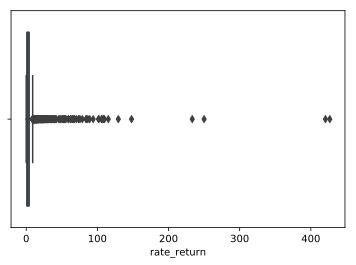

In [21]:
ax = sns.boxplot(x=tips["rate_return"])#箱线图

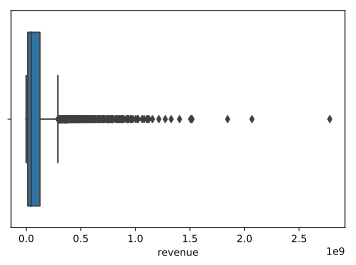

In [22]:
ax = sns.boxplot(x=tips["revenue"])#箱线图

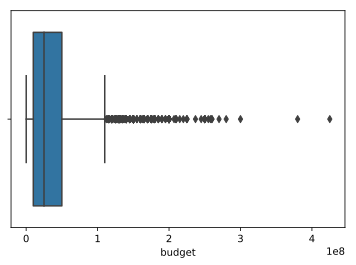

In [23]:
ax = sns.boxplot(x=tips["budget"])#箱线图

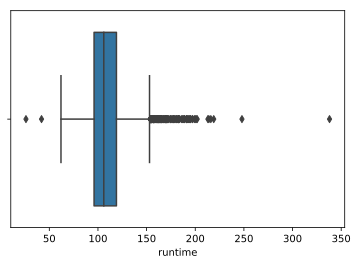

In [24]:
ax = sns.boxplot(x=tips["runtime"])#箱线图

对'rate_return', 'revenue', 'budget', 'runtime'四个特征值的箱线图观察，发现都具有多个异常值或极端异常值，数据分布状况极为松散，这可能跟电影市场的特殊状况有关系，需要获得其它数据以进一步确定。

Text(0.5,1,'Correlation coefficient')

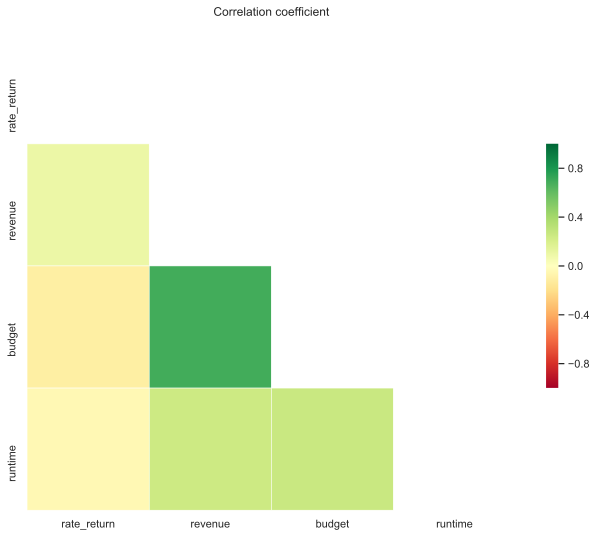

In [25]:
sns.set(style="white")#设置背景模式
df_tmdb_data_corr = df_tmdb_data_temp.corr()#获得数据集相关系数
mask = np.zeros_like(df_tmdb_data_corr, dtype=np.bool)#设置图形参数
mask[np.triu_indices_from(mask)] = True
plt.rcParams['figure.dpi'] = 300
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_tmdb_data_corr, mask=mask,  cmap="RdYlGn", vmax=1,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation coefficient')

In [26]:
print(df_tmdb_data_corr)

             rate_return   revenue    budget   runtime
rate_return     1.000000  0.097921 -0.106016 -0.041118
revenue         0.097921  1.000000  0.687753  0.249970
budget         -0.106016  0.687753  1.000000  0.258587
runtime        -0.041118  0.249970  0.258587  1.000000


通过对四列数值型数据的相关系数分析，我们发现，收益率（rate_return）与其他三个特征的相关性分别是：revenue（0.097921），budget（-0.106016）
runtime（-0.041118）。从相关系数结果来看，并未出现较为明显的正相关或负相关。意外的是，revenue与budget特征显示出了较明显的正相关（0.687753）。

### 2.发行年份收益率平均值分析

Text(0.5,1,'Year-Rate')

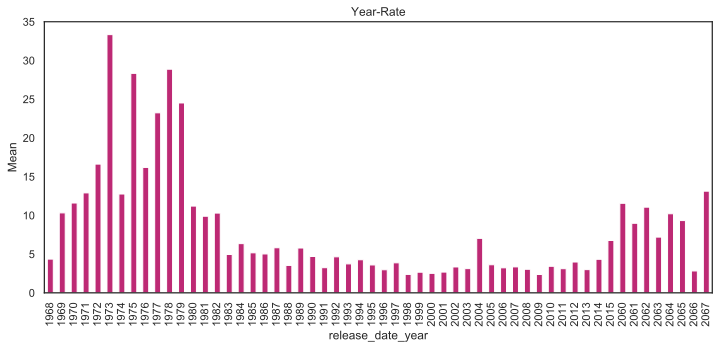

In [27]:
df_tmdb_data.groupby('release_date_year')['rate_return'].mean().plot(kind = 'bar',figsize=(12,5), color = np.random.rand(1,3))
plt.ylabel('Mean')
plt.title('Year-Rate')

通过初步观察，等等。。我们意外的发现了一处异常：数据分析图右下角的年份标签！（瞬间有些穿越，猜测可能是科幻片：！）于是对之前的操作进行了再一次检查，并未发现错误操作，但发现问题出在元素拆分部分，即将'release_date'拆分为年，月，日，周的部分。google发现这是一个有故事的内置函数时间转换问题,我们这里进行手工修正。

In [28]:
df_tmdb_data = df_tmdb_data.replace([2060, 2061, 2062, 2063,2064,2065,2066,2067], [1960,1961,1962,1963,1964,1965,1966,1976])

Text(0.5,1,'Year-Rate')

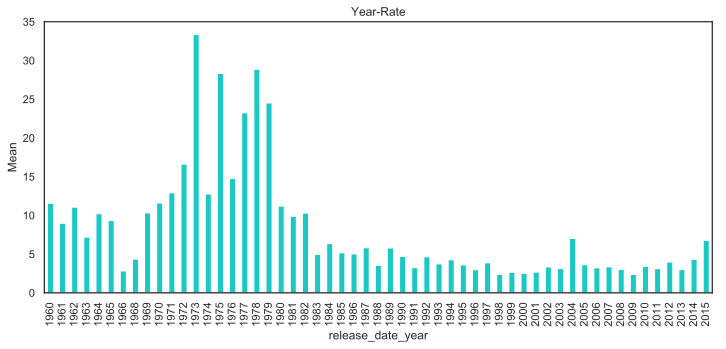

In [29]:
df_tmdb_data.groupby('release_date_year')['rate_return'].mean().plot(kind = 'bar',figsize=(12,5), color = np.random.rand(1,3))
plt.ylabel('Mean')
plt.title('Year-Rate')

正常显示！观察数据我们发现1973，1975，1977，1978，1979，这五个特征值较其它年份异常偏高！并且1980年后收益率普遍低于1980年之前，但因数据有限，并不能给出相关性解释，需要进一步结合更多相关数据进行探索。

### 3.发行月份收益率平均值分析

Text(0.5,1,'Month-Rate')

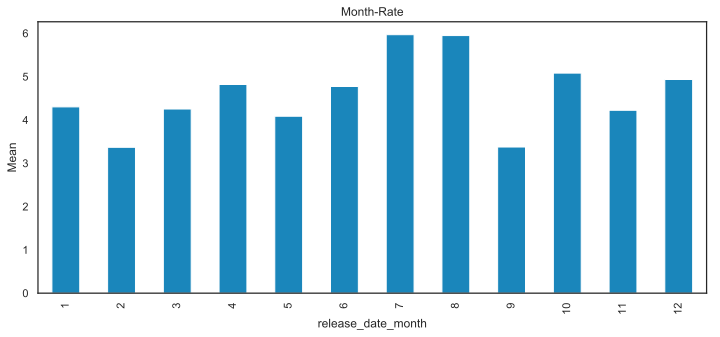

In [30]:
df_tmdb_data.groupby('release_date_month')['rate_return'].mean().plot(kind = 'bar',figsize=(12,5), color = np.random.rand(1,3))
plt.ylabel('Mean')
plt.title('Month-Rate')

数据显示，7，8两月份相较其它几个月份平均值略微偏高。2，9两月份略微偏低。并没有显现出特别明显的相关性。

### 4.发行日期收益率平均值分析

Text(0.5,1,'Day-Rate')

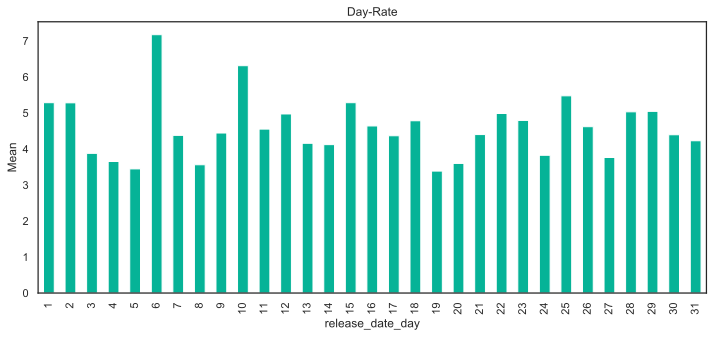

In [31]:
df_tmdb_data.groupby('release_date_day')['rate_return'].mean().plot(kind = 'bar',figsize=(12,5), color = np.random.rand(1,3))
plt.ylabel('Mean')
plt.title('Day-Rate')

从数据显示观察，6日的收益率平均值相较其它日期要高出许多，无法确定相关性因素。可能需结合其它更多数据源综合分析。

### 5.发行周日期收益率平均值分析

Text(0.5,1,'Week-Rate')

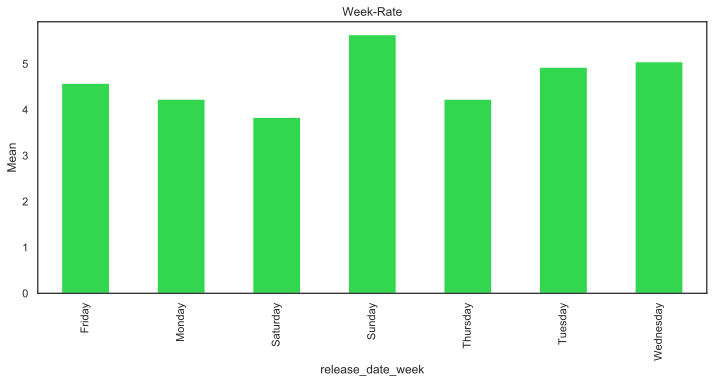

In [32]:
df_tmdb_data.groupby('release_date_week')['rate_return'].mean().plot(kind = 'bar',figsize=(12,5), color = np.random.rand(1,3))
plt.ylabel('Mean')
plt.title('Week-Rate')

数据显示，周日发行的收益率相较其它六个周日期略微高一点，并未呈现出明显相关性。

<a id='conclusions'></a>
## 结论

> **基于TMDB数据集，经过对rate_return与其它7个特征的探索分析，并未发现各公映电影收益率与所分析的7个特征有明显和确定的相关关系。但发行年份较为明显的样本差别提示我们，可能需要进一步结合更多的背景数据进行探索和分析。本次报告采用的数据集为TMDB官方数据，可靠性有待进一步确定。同时，对数据进行空值和0值以及异常值的丢弃处理，不会对原数据产生统计特征影响，但较大的减少了样本量，可能无法得出较为全面的分析结果。本次仅作为探索性分析，以发现可能的进一步探索方向。**

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295